In [1]:
from __future__ import division
import networkx as nx
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from datetime import datetime
%matplotlib inline

In [2]:
pse_companies = pd.read_csv("PSE-listed-companies.csv")
pse_companies = pse_companies[["Company Name", "Stock Symbol", "Sector", "Subsector", "Listing Date"]]
pse_companies.head()

,Company Name,Stock Symbol,Sector,Subsector,Listing Date
0,"Unioil Resources & Holdings Company, Inc.",UNI,Holding Firms,Holding Firms,27 July 1987
1,"Union Bank of the Philippines, Inc.",UBP,Financials,Banks,29 June 1992
2,United Paragon Mining Corporation,UPM,Mining and Oil,Mining,2 April 1973
3,Universal Robina Corporation,URC,Industrial,"Food, Beverage & Tobacco",25 March 1994
4,"Uniwide Holdings, Inc.",UW,Property,Property,19 August 1996


Get all files in directory.

In [3]:
files2016 = os.listdir("./2016/")

Explore content of one file. I am not exactly sure what the last two columns are.

In [4]:
df0 = pd.read_csv("./2016/" + files2016[0], header=None)
df0.columns = ["Company_Index", "Date", "Open", "High", "Low", "Close", "X1", "X2"]

In [5]:
df0.head()

,Company_Index,Date,Open,High,Low,Close,X1,X2
0,^FINANCIAL,01/04/2016,1554.07,1555.61,1531.13,1531.13,298140,59289
1,AUB,01/04/2016,46.30,46.30,45.00,46.15,12900,411515
2,BDO,01/04/2016,106.00,106.00,101.90,101.90,551000,10878135
3,BPI,01/04/2016,83.70,83.75,83.00,83.20,384540,9318360
4,CHIB,01/04/2016,37.50,37.50,37.05,37.05,33200,193819


Get companies. I am also creating a list of companies I want to discard in this analysis.

In [6]:
pse_comp = list(pse_companies["Stock Symbol"])
discard = ['UW', 'VMC', 'VVT', 'PRIM', 'PMT', 'REG', 'ROX', 'RCI', 'SPC', 'SPM', 'STR', 'STN', 'SRDC', 'SGP', 'MAH', 'MGH', 'NXGEN', 'PCP', 'PMPC', 'PAX', 'PHC', 'H2O', 'PNC', 'PRC', 'PTT', 'PTC', 'PORT', 'GPH', 'GREEN', 'KPH', 'LMG', 'LSC', 'CHP', 'CAT', 'CIP', 'CSB', 'DWC', 'ECP', 'EVER', 'EIBA', 'FEU', 'FFI', 'FYN', 'FAF', 'ABC', 'AAA', 'ATI', 'AB', 'BH', 'CHI', 'CPV']
companies = [company for company in pse_comp if company not in discard ]
print companies

['UNI', 'UBP', 'UPM', 'URC', 'V', 'VLL', 'VITA', 'VUL', 'WPI', 'WIN', 'X', 'YEHEY', 'ZHI', 'IPO', 'PHN', 'PNX', 'PSPC', 'PHA', 'PLC', 'POPI', 'PRMX', 'PPC', 'PGOLD', 'RFM', 'RCB', 'RLC', 'RRHI', 'ROCK', 'SBS', 'SM', 'SMPH', 'SOC', 'SSI', 'STI', 'SMC', 'PF', 'SECB', 'SCC', 'SHNG', 'SGI', 'SPH', 'SLI', 'SLF', 'SUN', 'SFI', 'T', 'PSE', 'OV', 'TFHI', 'TA', 'TAPET', 'TBGI', 'RWM', 'MJC', 'MA', 'MWC', 'MFC', 'MARC', 'MAXS', 'MWIDE', 'MEG', 'MCP', 'MPI', 'MRSGI', 'MBT', 'MG', 'NRCP', 'NI', 'NIKL', 'NOW', 'OM', 'ORE', 'OPM', 'PAL', 'TEL', 'TFC', 'LOTO', 'PA', 'PIP', 'PERC', 'PCOR', 'WEB', 'PX', 'PXP', 'PBC', 'PBB', 'PHES', 'PNB', 'RLT', 'PSB', 'SEVN', 'GTCAP', 'GSMI', 'FNI', 'GERI', 'GLO', 'HVN', 'TUGS', 'HLCM', 'HI', 'I', 'EG', 'IPM', 'IRC', 'ISM', 'IMP', 'IMI', 'ICT', 'ION', 'IS', 'IDC', 'JGS', 'JAS', 'JFC', 'JOH', 'KEP', 'LBC', 'LTG', 'LR', 'LC', 'LFM', 'LIB', 'LIHC', 'LPZ', 'MED', 'MJIC', 'MRC', 'MHC', 'MVC', 'MACAY', 'MAC', 'MFIN', 'MBC', 'MB', 'MER', 'CEU', 'CNPF', 'CPM', 'CPG', 'CHIB', 

Filter dataframe to companies only. And focus on closing prices.

In [7]:
df0 = df0[df0.Company_Index.isin(companies)]

In [8]:
df0 = df0[["Company_Index", "Date", "Close"]]

In [9]:
df0.head()

,Company_Index,Date,Close
1,AUB,01/04/2016,46.15
2,BDO,01/04/2016,101.90
3,BPI,01/04/2016,83.20
4,CHIB,01/04/2016,37.05
5,EW,01/04/2016,18.22


In [10]:
allprices = pd.DataFrame()
for f in files2016:
    df = pd.read_csv("./2016/" + f, header=None)
    df.columns = ["Company_Index", "Date", "Open", "High", "Low", "Close", "Volume1", "Volume2"]
    df = df[df.Company_Index.isin(companies)]
    df.Date = pd.to_datetime(df.Date)
    df = df[["Company_Index", "Date", "Close"]]
    allprices = pd.concat([allprices,df], ignore_index = True)

In [11]:
allprices.head()

,Company_Index,Date,Close
0,AUB,2016-01-04,46.15
1,BDO,2016-01-04,101.90
2,BPI,2016-01-04,83.20
3,CHIB,2016-01-04,37.05
4,EW,2016-01-04,18.22


In [12]:
print set(list(allprices.Company_Index))

set(['PXP', 'CPM', 'AGI', 'BC', 'JFC', 'AGF', 'POPI', 'FMETF', 'CPG', 'RWM', 'IDC', 'SCC', 'BMM', 'PAL', 'FNI', 'MED', 'PERC', 'RRHI', 'LIB', 'GMA7', 'GERI', 'CROWN', 'MJIC', 'SPH', 'ION', 'LBC', 'MFIN', 'YEHEY', 'PIP', 'LR', 'WEB', 'LPZ', 'URC', 'VITA', 'OM', 'GMAP', 'GSMI', '2GO', 'T', 'PGOLD', 'X', 'MRC', 'APX', 'UBP', 'PHN', 'SMPH', 'HOUSE', 'PHA', 'CDC', 'IPO', 'IPM', 'MAC', 'APO', 'SFI', 'BCOR', 'APC', 'TBGI', 'FDC', 'DMC', 'BEL', 'AEV', 'MWC', 'HI', 'EEI', 'EMP', 'GTCAP', 'MFC', 'VLL', 'PX', 'CEI', 'PRMX', 'CEU', 'PA', 'PF', 'GEO', 'EG', 'UPM', 'BLFI', 'FOOD', 'BDO', 'CNPF', 'STI', 'PHES', 'TUGS', 'NRCP', 'PBC', 'PBB', 'ABSP', 'EW', 'JGS', 'RFM', 'MG', 'MA', 'OV', 'PSB', 'MWIDE', 'MPI', 'AR', 'HLCM', 'ANS', 'OPM', 'NOW', 'AT', 'TAPET', 'ACE', 'GLO', 'ATN', 'SUN', 'VUL', 'ACR', 'PCOR', 'ISM', 'CHIB', 'FJP', 'SMC', 'COL', 'LAND', 'NI', 'ALHI', 'SECB', 'TEL', 'DMPL', 'LFM', 'TECH', 'WPI', 'BKR', 'ICT', 'BSC', 'AUB', 'IMI', 'DNL', 'COSCO', 'JOH', 'MVC', 'LTG', 'SBS', 'V', 'UNI', 'FL

In [13]:
subset = allprices[(allprices.Date > datetime(2016,1,1,0,0,0)) & (allprices.Date < datetime(2016,7,31,23,59,59))]
final_df = subset.pivot(index="Date", columns="Company_Index", values="Close")

In [14]:
final_df.head()

Company_Index,2GO,ABA,ABG,ABS,ABSP,AC,ACE,ACR,AEV,AGF,...,V,VITA,VLL,VUL,WEB,WIN,WPI,X,YEHEY,ZHI
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,7.00,0.370,10.30,62.40,64.0,756,NaN,1.38,57.20,2.80,...,3.20,0.59,5.00,1.05,23.0,NaN,NaN,15.62,4.10,NaN
2016-01-05,6.91,0.370,10.28,62.30,63.0,742,NaN,1.37,57.75,2.71,...,1.83,0.59,5.00,1.08,22.7,0.21,0.33,15.52,4.12,0.250
2016-01-06,6.80,0.365,10.20,62.00,62.6,732,1.14,1.39,57.90,2.58,...,1.80,0.62,4.97,1.06,21.5,NaN,0.34,15.20,3.88,NaN
2016-01-07,6.63,0.370,10.22,61.75,62.1,709,1.15,1.36,56.00,2.65,...,1.76,0.58,4.82,1.03,21.0,0.20,0.33,14.48,3.62,0.231
2016-01-08,6.55,0.360,10.18,61.10,62.0,700,1.12,1.35,56.30,2.50,...,1.70,0.56,4.93,1.06,21.0,0.19,0.32,14.64,3.38,0.231


In [15]:
price_corr = final_df.corr()

In [34]:
print price_corr['BLOOM']

Company_Index
2GO      0.444842
ABA      0.469433
ABG      0.216075
ABS     -0.554632
ABSP    -0.502487
AC       0.709600
ACE      0.501082
ACR      0.675863
AEV      0.674950
AGF      0.592122
AGI      0.458768
ALCO     0.535607
ALHI     0.200236
ALI      0.831734
ALT      0.135364
ANI     -0.203576
ANS      0.194104
AP       0.574463
APC      0.578459
APO      0.495955
APX      0.818516
AR      -0.103225
ARA      0.462090
AT       0.457360
ATN      0.380356
AUB      0.733610
BC       0.030774
BCOR    -0.751862
BDO      0.906769
BEL      0.701012
           ...   
SMC      0.662514
SMPH     0.798909
SOC      0.656552
SPH      0.307270
SSI      0.445145
STI      0.527330
SUN      0.427718
T        0.604225
TA       0.475965
TAPET    0.579306
TBGI     0.062786
TECH    -0.206576
TEL      0.276264
TFC      0.042889
TFHI     0.745229
TUGS     0.186791
UBP      0.646175
UNI      0.455606
UPM      0.321868
URC      0.475354
V       -0.102804
VITA     0.481919
VLL      0.709708
VUL      0.516

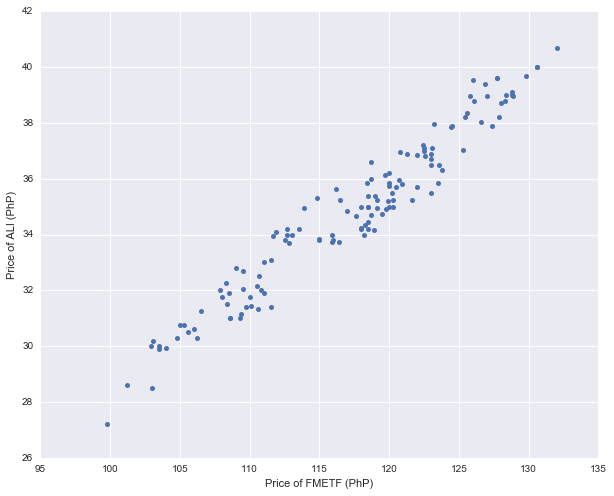

In [41]:

plt.figure(figsize=(10,8))
plt.plot(final_df['FMETF'], final_df["ALI"], '.', markersize=10)
plt.xlabel("Price of FMETF (PhP)")
plt.ylabel("Price of ALI (PhP)")
_ = plt.show()

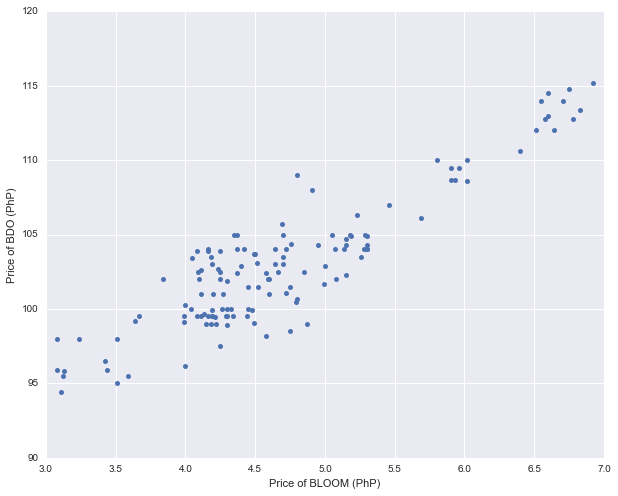

In [42]:

plt.figure(figsize=(10,8))
plt.plot(final_df['BLOOM'], final_df["BDO"], '.', markersize=10)
plt.xlabel("Price of BLOOM (PhP)")
plt.ylabel("Price of BDO (PhP)")
_ = plt.show()

In [16]:
change = (final_df.iloc[-1] - final_df.iloc[0])*100/final_df.iloc[0]
price_corr1 = final_df.corr()
price_corr_bonanno = np.sqrt(2*(1-(price_corr1)))
price_corr_mktstk = 1-abs(price_corr1)
labs_bonanno = list(price_corr_bonanno.index)
labs_mktstk = list(price_corr_mktstk.index)
G_bonanno = nx.from_numpy_matrix(price_corr_bonanno.as_matrix())
G_mktstk = nx.from_numpy_matrix(price_corr_mktstk.as_matrix())
#G.nodes=price_corr.index

In [17]:
Gm_b = nx.minimum_spanning_tree(G_bonanno)  
Gm_m = nx.minimum_spanning_tree(G_mktstk)  

for node in Gm_b.nodes():
    sector = pse_companies[pse_companies["Stock Symbol"] == labs_bonanno[node]].Sector.iloc[0]
    Gm_b.node[node]["sector"] = sector
    Gm_b.node[node]["label"] = labs_bonanno[node]
    if math.isnan(change[labs_bonanno[node]]):
        #print change[labs_bonanno[node]], labs_bonanno[node]
        #Gm.node[node]["change"] = 101
        Gm_b.node[node]["color"] = "black"
    elif change[labs_bonanno[node]] < -10:
        Gm_b.node[node]["color"] = "red"
    elif change[labs_bonanno[node]] > 10:
        Gm_b.node[node]["color"] = "green"
    else:
        Gm_b.node[node]["color"] = "blue"
        
nx.write_gexf(Gm_b, "corrmat_bonanno.gexf")

for node in Gm_m.nodes():
    sector = pse_companies[pse_companies["Stock Symbol"] == labs_bonanno[node]].Sector.iloc[0]
    Gm_m.node[node]["sector"] = sector
    Gm_m.node[node]["label"]=labs_mktstk[node]
    if math.isnan(change[labs_mktstk[node]]):
        #print change[labs_mktstk[node]], labs_mktstk[node]
        #Gm.node[node]["change"] = 101
        Gm_m.node[node]["color"] = "black"
    elif change[labs_mktstk[node]] < -10:
        Gm_m.node[node]["color"] = "red"
    elif change[labs_mktstk[node]] > 10:
        Gm_m.node[node]["color"] = "green"
    else:
        Gm_m.node[node]["color"] = "blue"
        
nx.write_gexf(Gm_m, "corrmat_mktstk.gexf")

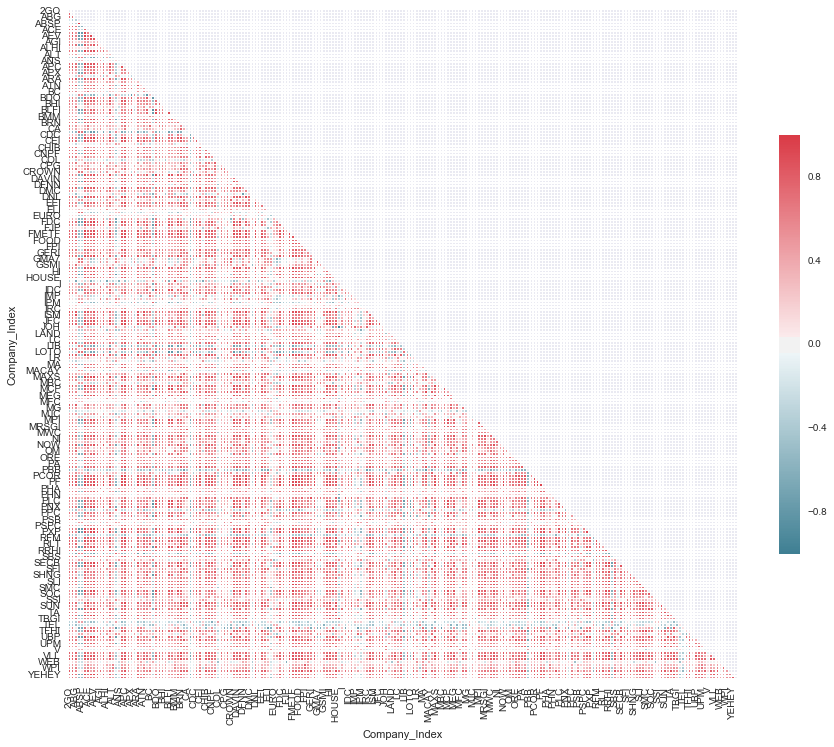

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(price_corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(price_corr1, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

_ = plt.show()

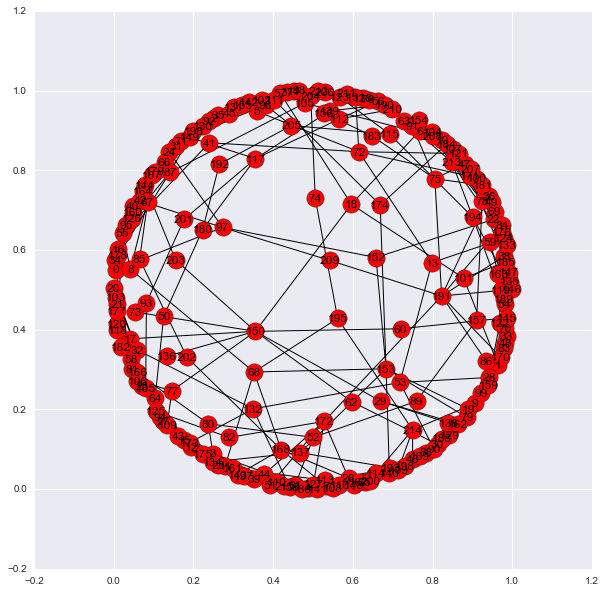

In [19]:
plt.figure(figsize=(10,10))
nx.draw_networkx(Gm_b)

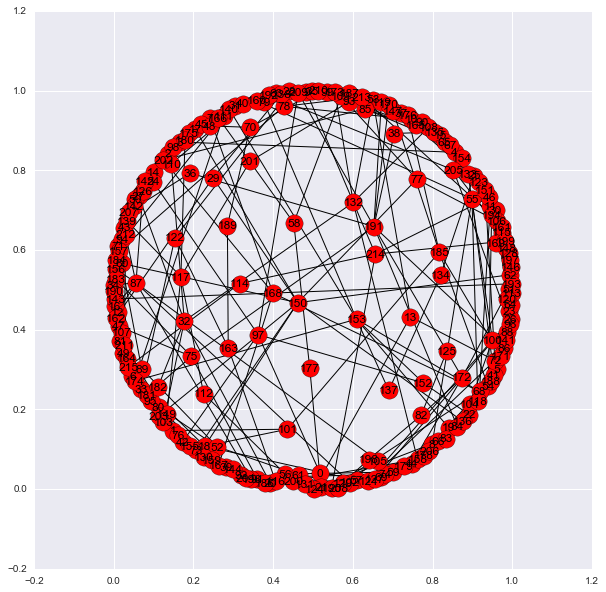

In [20]:
plt.figure(figsize=(10,10))
nx.draw_networkx(Gm_m)